## Movies Analysis

In this project, we're going to analyze a dataset from kaggle. The dataset from [kaggle](https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extraction-prediction) contains informations about some netflix movies and tvshows scrapped from imdb.

### Project Goal:
Our goal as Data Analysts is to answer these questions:

- Which movies are the top and least rated?
- Which genres has the most rating?
- Which movies grossed the most?
- Which movies were rated the most in 2020?
- Which movies had the most votes?

This project will use the following six steps of the data analysis process to answer the above two questions of the project goal:

1. Get Data
2. Explore Data
3. Clean Data
4. Analyze Data
5. Conclusion

### 1. Get Data

In [1]:
#import the neeeded libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv('movies 1.csv')
movie .head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


Below is the Data Dictionary

- Movie: The name of the movie
- Year: The year of movie or TV telecast for audience
- Genre: The genres of the movie
- Rating: The audience thought about the movie or TV show given
- One-line: Short description about movies or TV show for audience first impression.
- Stars: The casting of art
- Votes: The votes by the audience
- Runtime: the duration of the movie
- Gross: Total amount earned for the movie

### 2. Explore the data

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
#modify the columns to lowercase
movie = movie.rename(columns=str.lower)
movie.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [5]:
#explore the numerical columns of the dataset
movie.describe()

,rating,runtime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [6]:
#check for duplicate rows
duplicate_rows = movie.duplicated(subset = ['movies'])
print(duplicate_rows)

movie.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
9994     True
9995    False
9996    False
9997     True
9998     True
Length: 9999, dtype: bool


431

Upon exploration, we discovered that the dataset has several null values and also 431 duplicates. Some column entries has special characters too. Also, some columns have the wrong datatype. Next step will be to clean the data inorder to make our analysis smooth.

### 3. Clean the Data

In [7]:
#drop the duplicate rows
movie = movie.drop_duplicates()

#print the shape of the dataset to confirm the operation
movie.shape

(9568, 9)

After confirming that the duplicates were dropped, the next line of action is to start cleaning up the columns inorder to perform analysis.

In [8]:
#clean the year column by removing unwanted characters
movie["year"] = movie["year"].str.replace('(', '')
movie["year"] = movie["year"].str.replace(')', '')
movie["year"] = movie["year"].str.replace('– ', '')
movie['year']

0            2021
1            2021
2       2010–2022
3            2013
4            2021
          ...    
9993         2022
9995         2021
9996         2022
9997         2021
9998         2021
Name: year, Length: 9568, dtype: object

In [9]:
#remove the special character in the oneline,genre and stars column entries
movie["genre"] = movie["genre"].str.replace('\n', '')
movie["one-line"] = movie["one-line"].str.replace('\n', '')
movie["stars"] = movie["stars"].str.replace('\n', '')
movie.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN


In [10]:
#fill the nan values with 0
movie['rating'].fillna('0',inplace = True)
movie.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN


In [11]:
#clean the votes column
movie['votes'] = movie['votes'].str.replace(',', '')
movie['votes'].fillna('0',inplace = True)
movie['votes'] = movie['votes'].astype(int)

In [12]:
#clean the gross column
movie['gross'] = movie['gross'].str.replace('$', '')
movie['gross'] = movie['gross'].str.replace('M', '')
movie['gross'].fillna('0',inplace = True)
movie['gross'] = movie['gross'].astype(float)

We have succeded in cleaning up most of the columns for our analysis, other cleaning needed will be performed duly. Analysing the data to provide answers to our questions is the next step to take.

### 4. Analyse the Data

In [13]:
#sort the values for top 5 most rated movie
movie['rating'] = pd.to_numeric(movie['rating'],errors = 'coerce')
sorted_movie = movie.sort_values(by = 'rating',ascending = False)
sorted_movie['movies'].head()

7640                BoJack Horseman
8510     Avatar: The Last Airbender
8509     Avatar: The Last Airbender
9892                         Dexter
8767                           Dark
Name: movies, dtype: object

###### The top 5 most rated movies are
1. Bojack Horseman
2. Avatar: The Last Airbender
3. Avatar: The Last Airbender
4. Dexter
5. Dark

In [14]:
#split the genre column to get the first entry
movie['genres'] = movie['genre'].str.split(',').str[0]
movie

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,genres
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,0.0,Action
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",17870,25.0,0.0,Animation
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",885805,44.0,0.0,Drama
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",414849,23.0,0.0,Animation
4,Army of Thieves,2021,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,0,NaN,0.0,Action
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",0.0,Add a Plot,Director:Nicolai Rohde| Stars:Felix Kl...,0,NaN,0.0,Drama
9995,Arcane,2021,"Animation, Action, Adventure",0.0,Add a Plot,,0,NaN,0.0,Animation
9996,Heart of Invictus,2022,"Documentary, Sport",0.0,Add a Plot,Director:Orlando von Einsiedel| Star:P...,0,NaN,0.0,Documentary
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",0.0,Add a Plot,Director:Jovanka Vuckovic| Stars:Morga...,0,NaN,0.0,Adventure


In [15]:
#dropping the null rows in the rating column
movies_without_rating_nulls = movie.dropna(subset=['rating'])

# Dropping rows with rating equal to 0
movies_without_zero_rating = movies_without_rating_nulls[movies_without_rating_nulls['rating'] != 0]

# 10 least rated movies
movies_without_zero_rating.sort_values(by='rating', ascending=True)[["movies","rating","genres"]].head(5)

,movies,rating,genres
1166,Raketsonyeondan,1.1,Comedy
5365,Defcon 2012,1.8,Sci-Fi
4332,Way of the Vampire,2.0,Action
5037,Hajwala,2.1,Action
3528,Sinister Squad,2.1,Action


###### The least rated movies are
1. Raketsonyeondan
2. Defcon 2012
3. Way of the Vampire
4. Hajwala
5. Sinister Squad

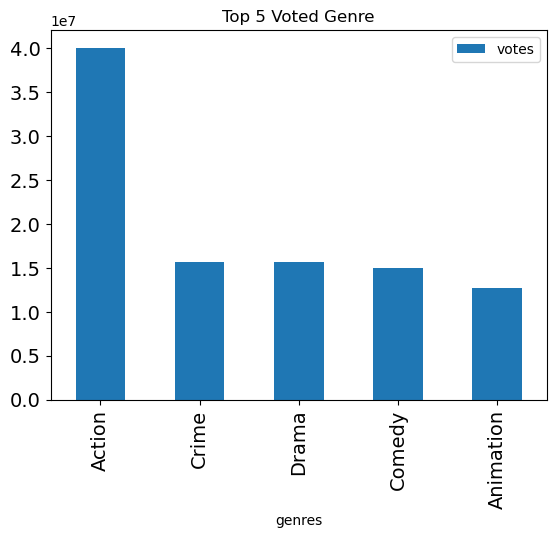

In [16]:
#aggregate the genre column by sum and plot the graph
toprated_movie = movie.groupby('genres').agg({'votes':'sum'})
toprated_movie_sort = toprated_movie.sort_values(by = 'votes',ascending = False).head()
toprated_movie_sort.plot(kind = 'bar', title = 'Top 5 Voted Genre',fontsize = 14)
plt.show()

Based on the visualization, we noted the following genres with the highest vote aggregates:

1. Action movies
2. Crime and Drama genres share an equal vote aggregate
3. Comedy
4. Animation

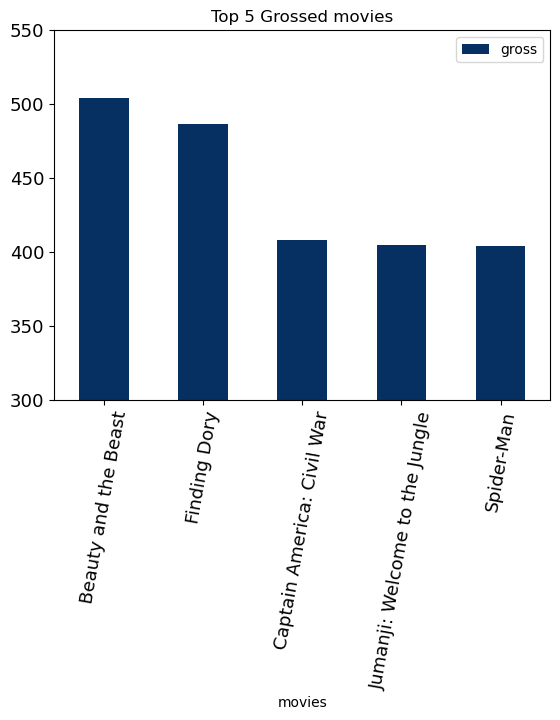

In [17]:
#Top 5 grossing movie
sorted_movies = movie.sort_values("gross",ascending=False)[["movies","gross"]].head(5)
sorted_movies.plot(x = 'movies', kind = 'bar', title = 'Top 5 Grossed movies', rot = 80, colormap = 'RdBu_r',fontsize = 13)
plt.ylim((300,550))
plt.show()

The bar chart above reveals the top five highest-grossing movies:

1. Beauty and the Beast
2. Finding Dory
3. Captain America: Civil War
4. Jumanji: Welcome to the Jungle
5. Spider-Man

In [18]:
#Most rated movies in 2020
specific_year_data = movie[movie['year'] == "2020"].sort_values(by='rating', ascending=False)[["movies","year","rating"]].head(10)
specific_year_data

,movies,year,rating
8541,The Midnight Gospel,2020,9.7
9080,Paranormal,2020,9.5
7421,Julie and the Phantoms,2020,9.4
7422,Julie and the Phantoms,2020,9.4
8932,Glitch Techs,2020,9.4
8959,The Queen's Gambit,2020,9.3
8933,Glitch Techs,2020,9.3
9079,Paranormal,2020,9.2
8930,Glitch Techs,2020,9.2
8538,The Midnight Gospel,2020,9.2


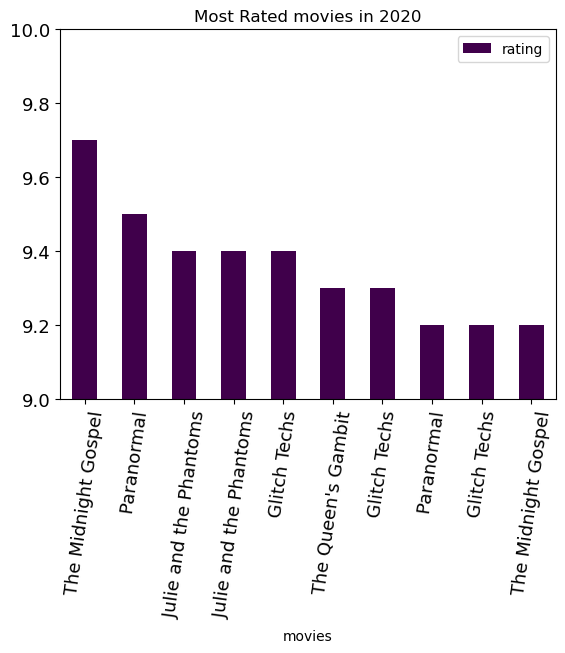

In [19]:
#plot a graph to display the most rated movies in 2020
specific_year_data.plot(x = 'movies', kind = 'bar', title = 'Most Rated movies in 2020', rot = 82, colormap = 'PRGn', fontsize = 13)
plt.ylim((9,10))
plt.show()

According to our analysis, the most rated Netflix movies in 2020, listed from highest to lowest, are:

1. The Midnight Gospel
2. Paranormal
3. Julie and the Phantoms
4. Glitch Techs
5. The Queen's Gambit

In [20]:
#Top 5 movies with highest votes
sorted_votes = movie.sort_values("votes",ascending=False)[["movies","votes"]].head(5)
sorted_votes

,movies,votes
111,The Lord of the Rings: The Fellowship of the Ring,1713028
193,The Lord of the Rings: The Return of the King,1691777
16,Breaking Bad,1552311
260,The Lord of the Rings: The Two Towers,1529752
132,The Departed,1227522


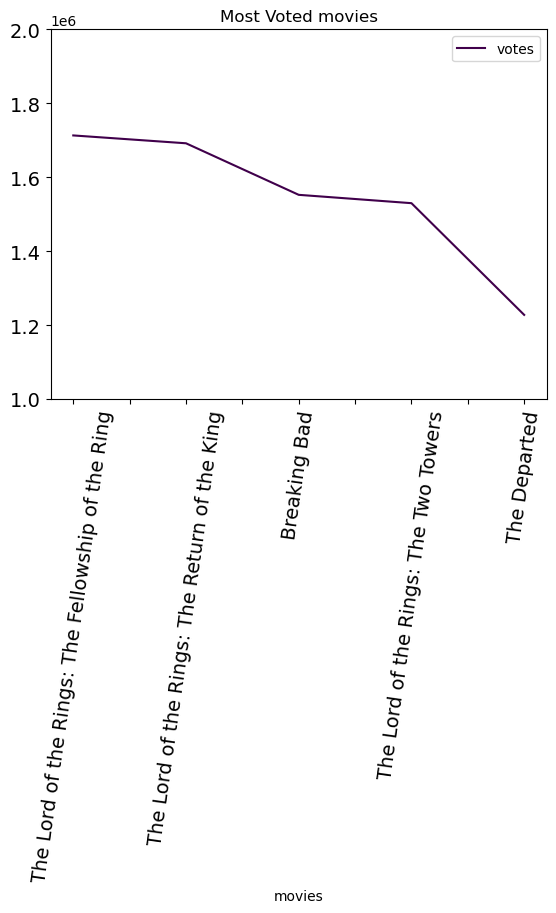

In [21]:
#plot a graph to display the most voted movies in 2020
sorted_votes.plot(x = 'movies', kind = 'line', title = 'Most Voted movies', rot = 82, colormap = 'PRGn', fontsize = 14)
plt.ylim((1000000,2000000))
plt.show()

### 5. Conclusion

So far, the analysis has enabled us to get insights to the dataset and answer the questions we highlighted. This project covers various methods of data cleaning and analysis to reach our goal.

The process we took involved
- Getting the data
- Exploring the data
- Cleaning the data
- Analysing the data to get insight

There is room for further insights to be drawn from the dataset. The dataset can also be used for movie recommendation.